C:\Users\jhoffm72\Documents\FilPHANGS\Data\IC5146_PSW\SyntheticMap
C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F2100W\SyntheticMap
C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F770W\SyntheticMap


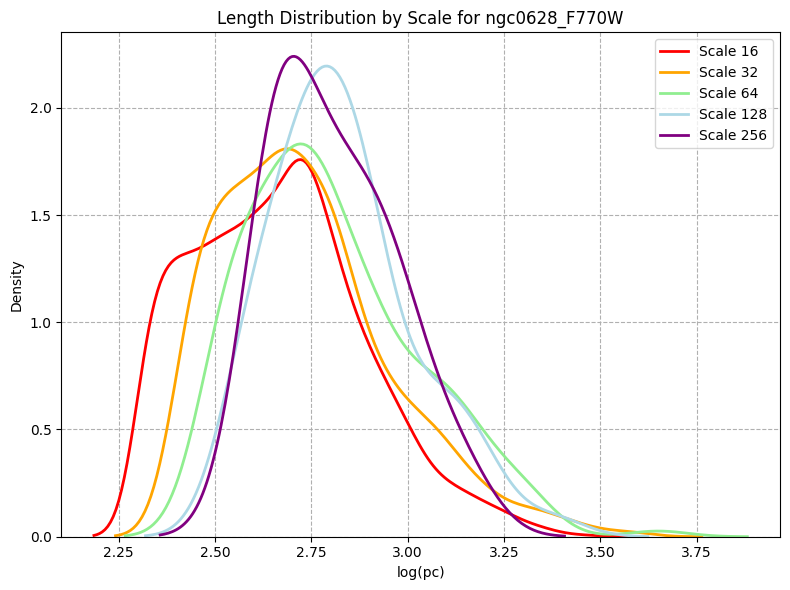

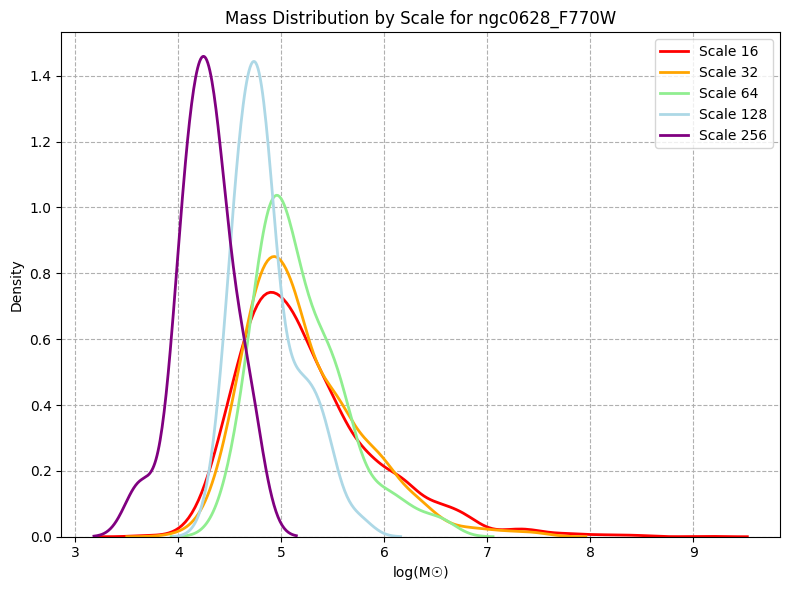

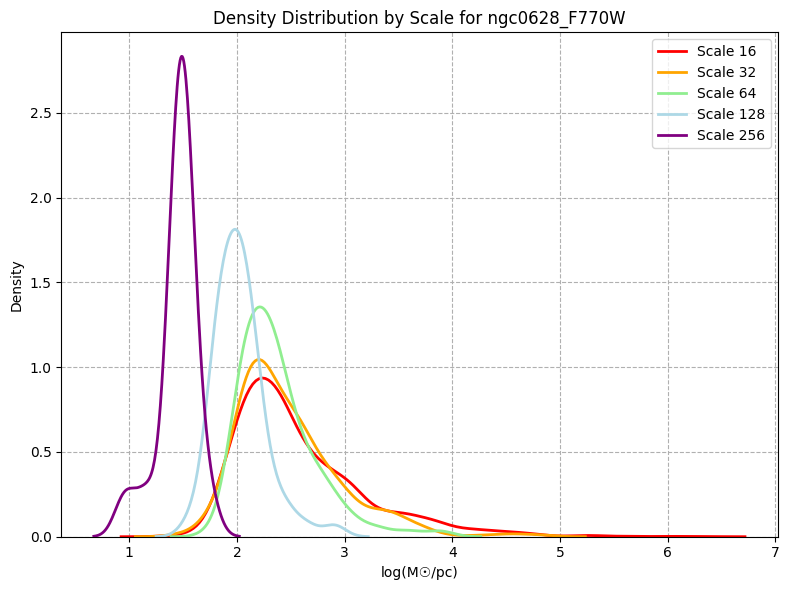

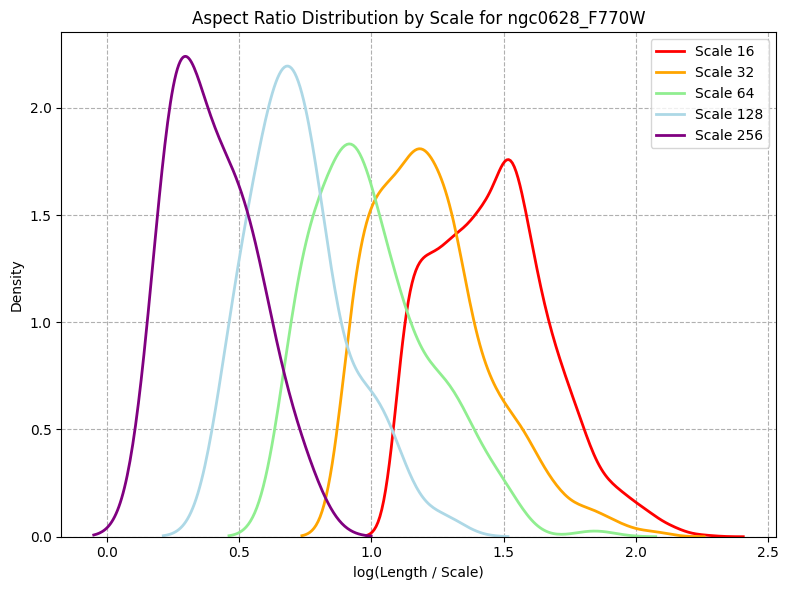

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1087_F770W\SyntheticMap


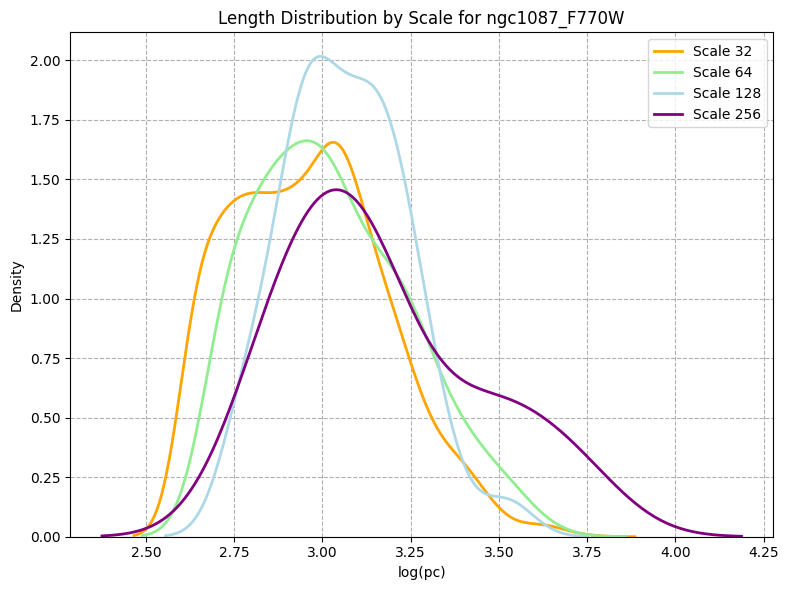

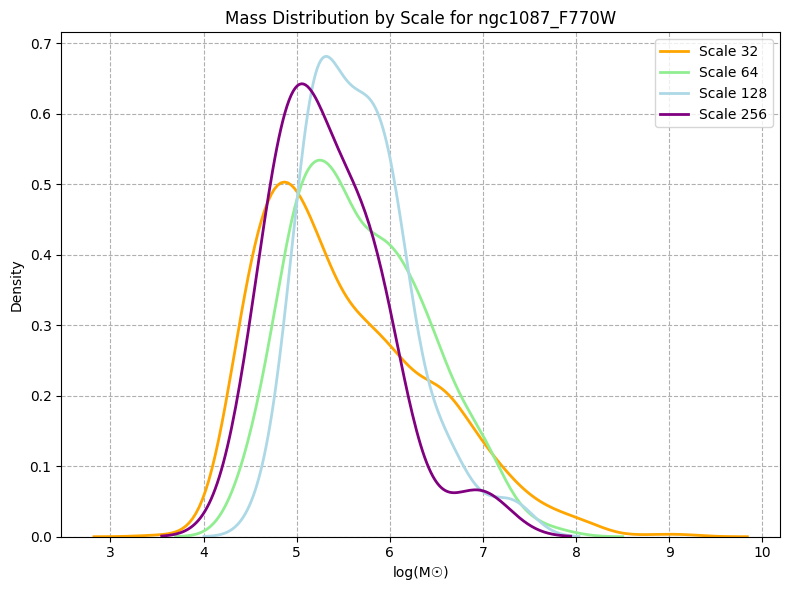

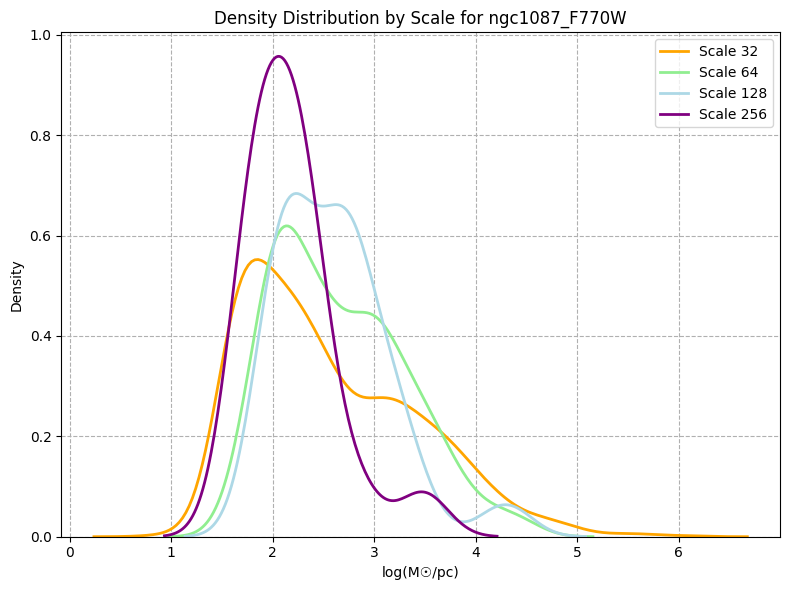

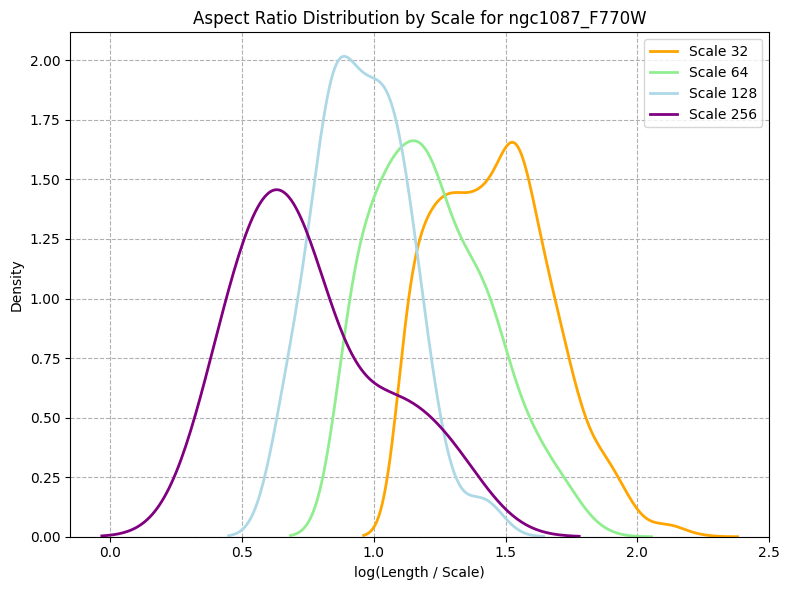

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1300_F770W\SyntheticMap


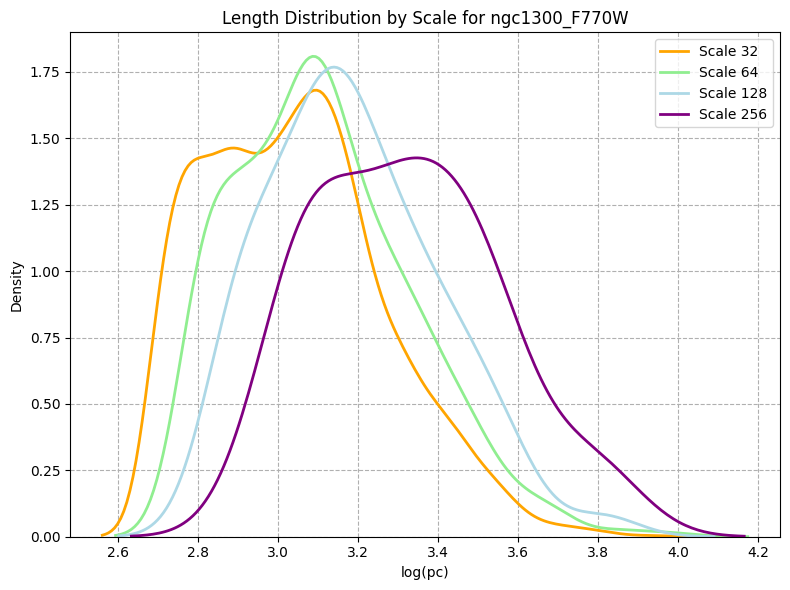

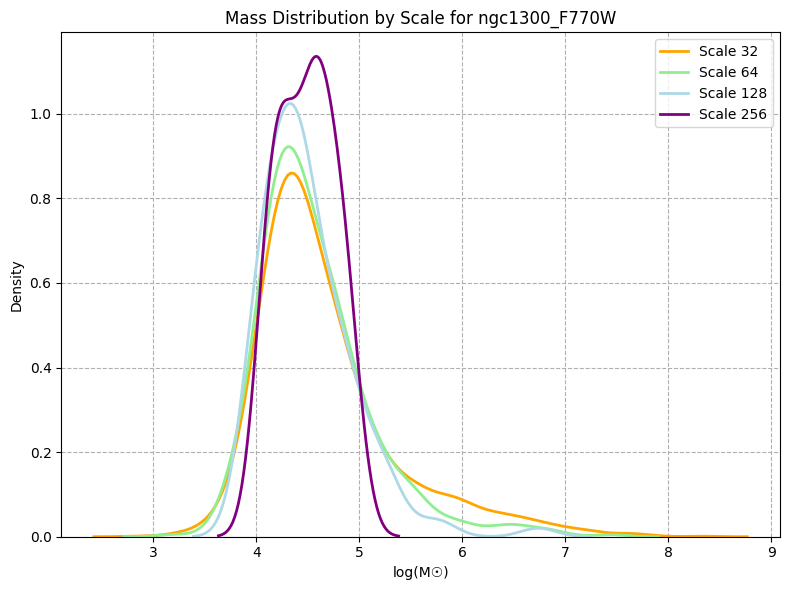

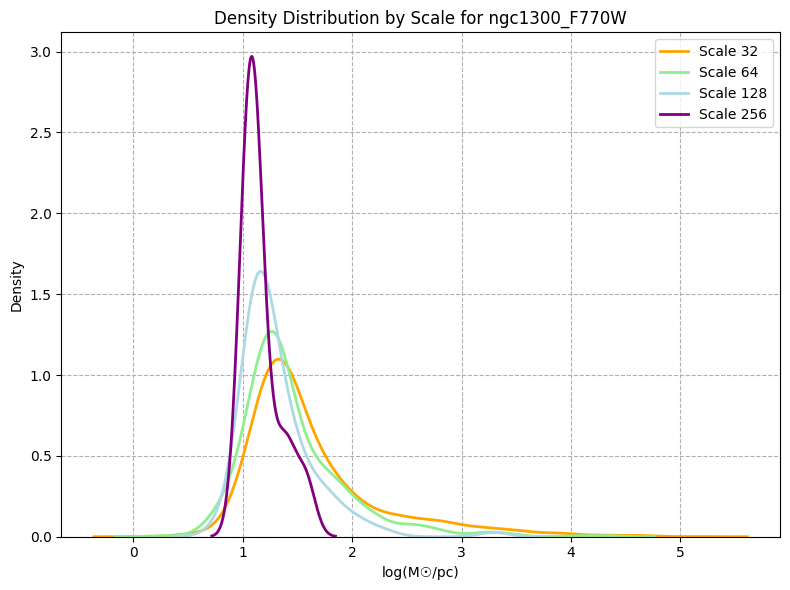

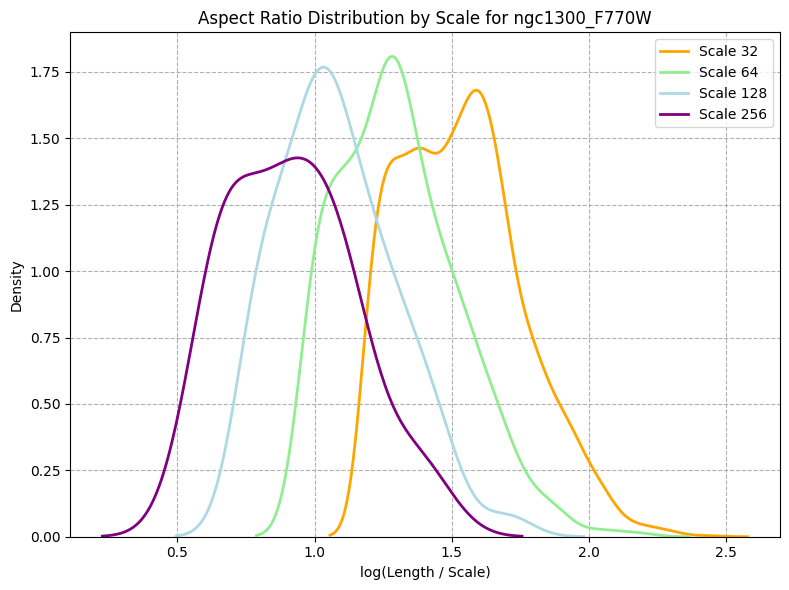

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1365_F770W\SyntheticMap


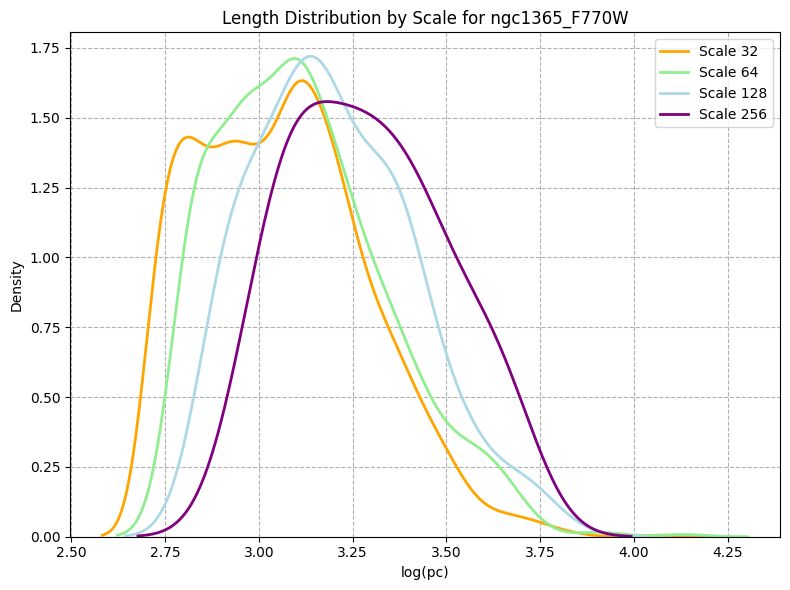

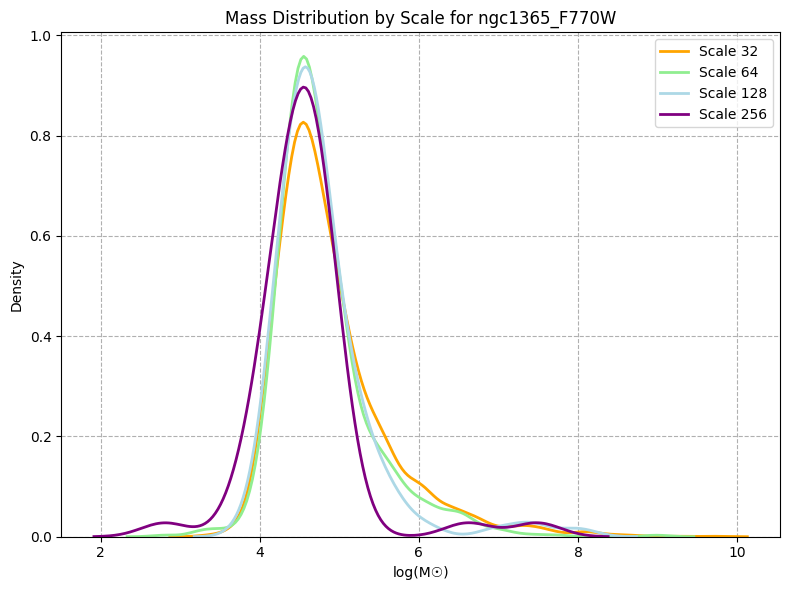

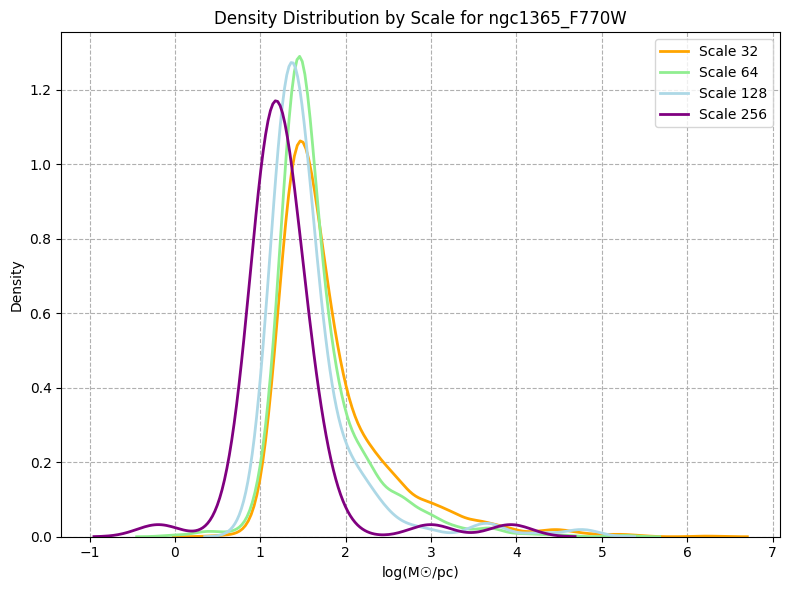

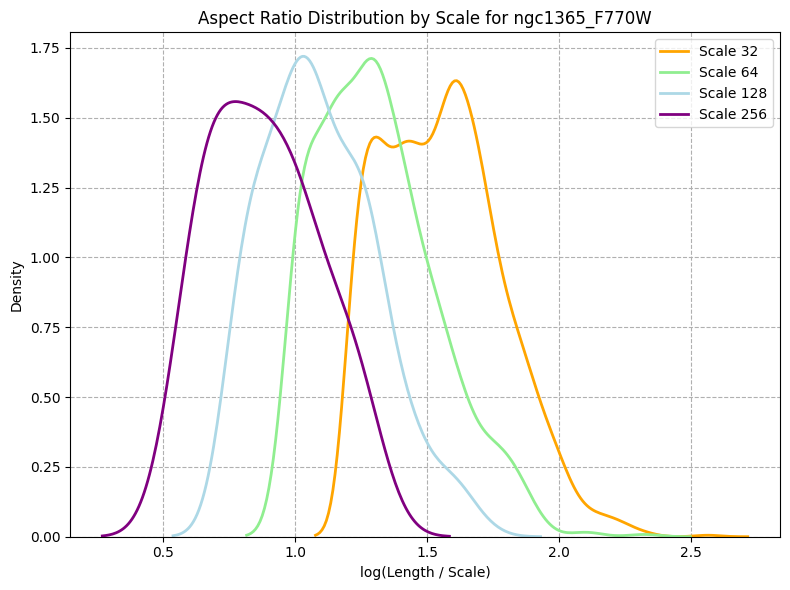

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1385_F770W\SyntheticMap


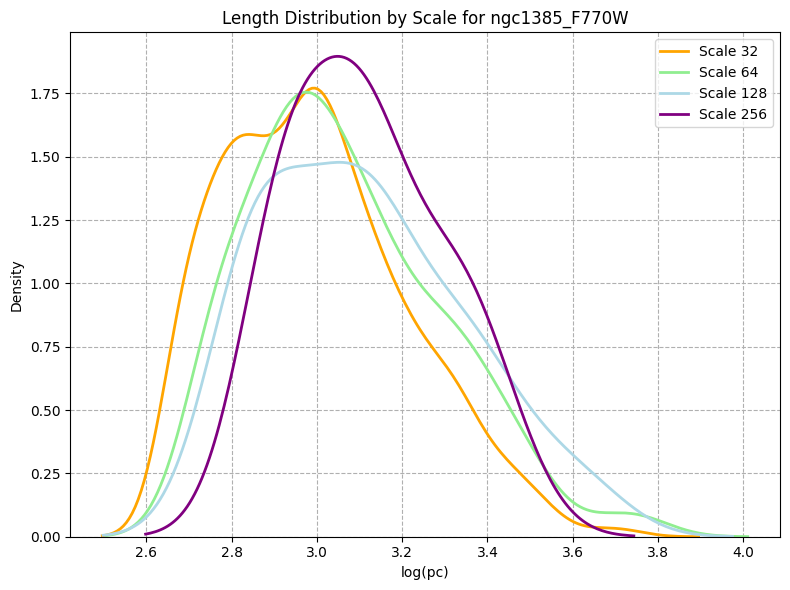

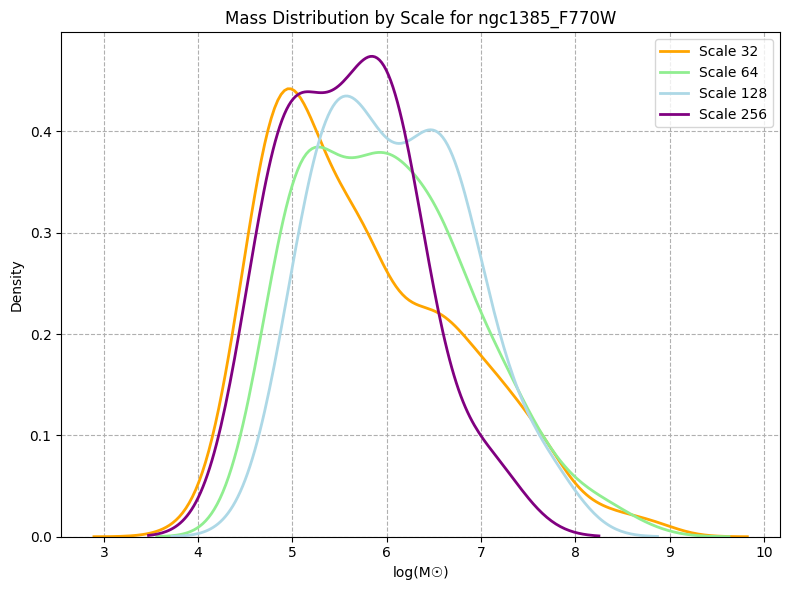

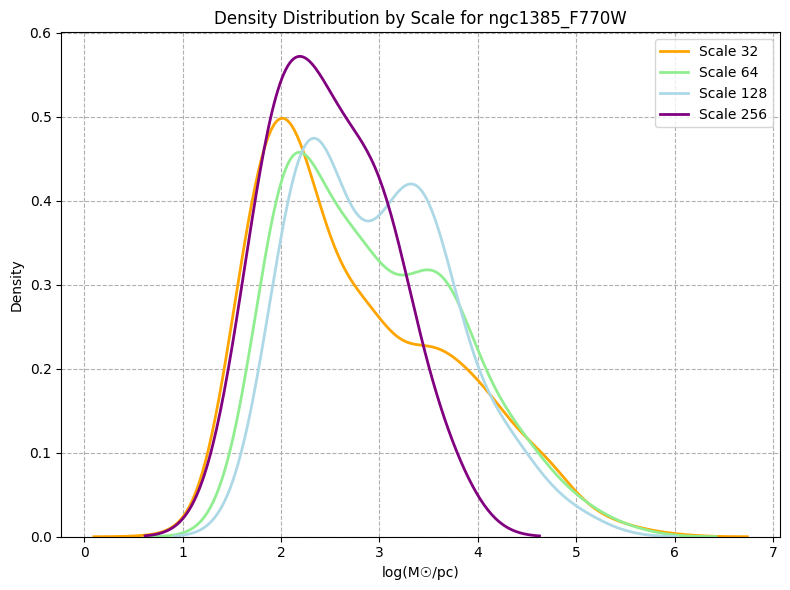

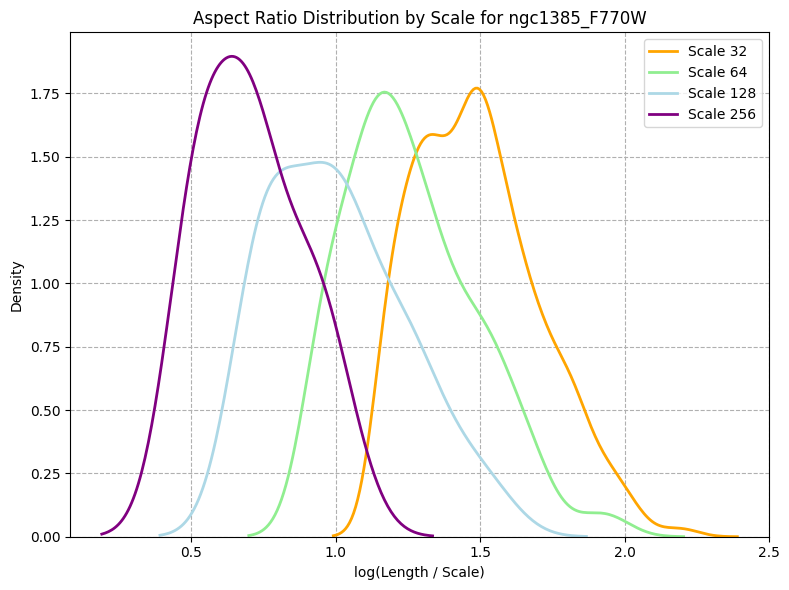

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1433_F770W\SyntheticMap


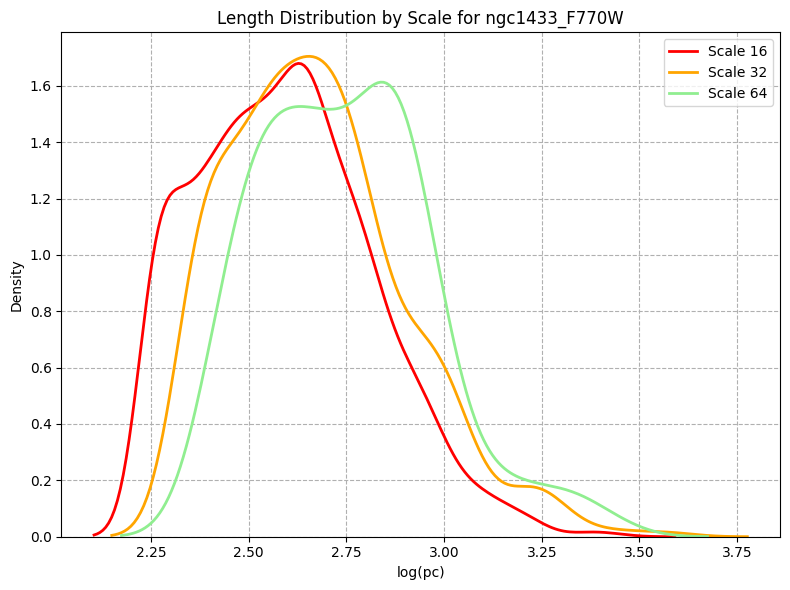

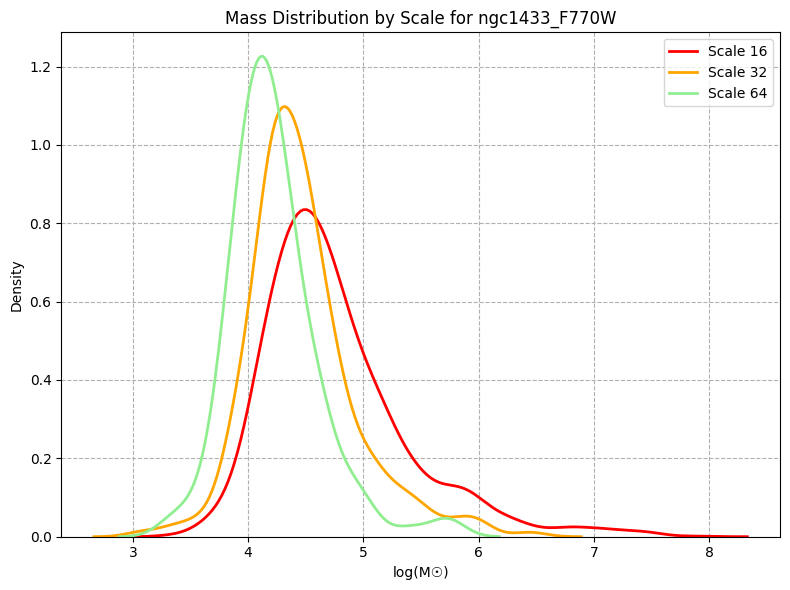

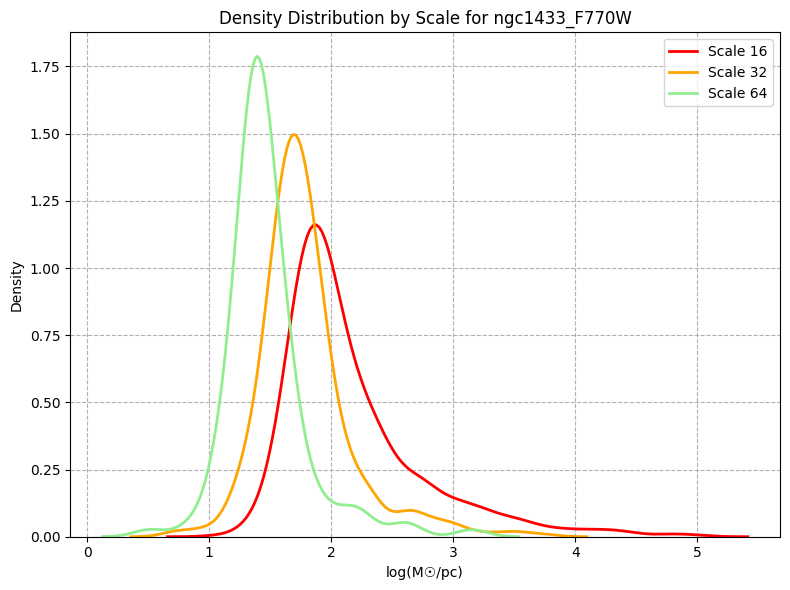

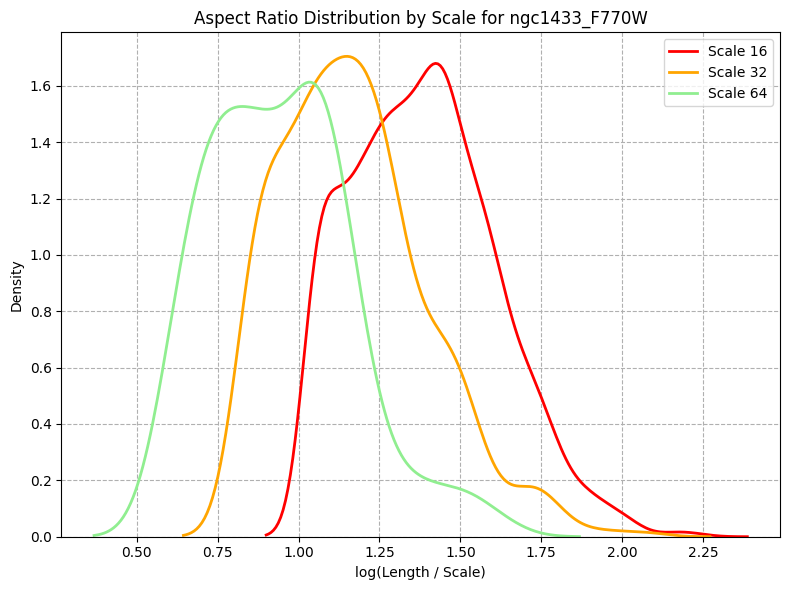

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1512_F770W\SyntheticMap
Missing expected columns for scale 512 in file: ngc1512_F770W_JWST_Emission_starsub_CDDss0032pc_DensityData.csv
Missing expected columns for scale 512 in file: ngc1512_F770W_JWST_Emission_starsub_CDDss0064pc_DensityData.csv
Missing expected columns for scale 512 in file: ngc1512_F770W_JWST_Emission_starsub_CDDss0128pc_DensityData.csv
C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1566_F770W\SyntheticMap


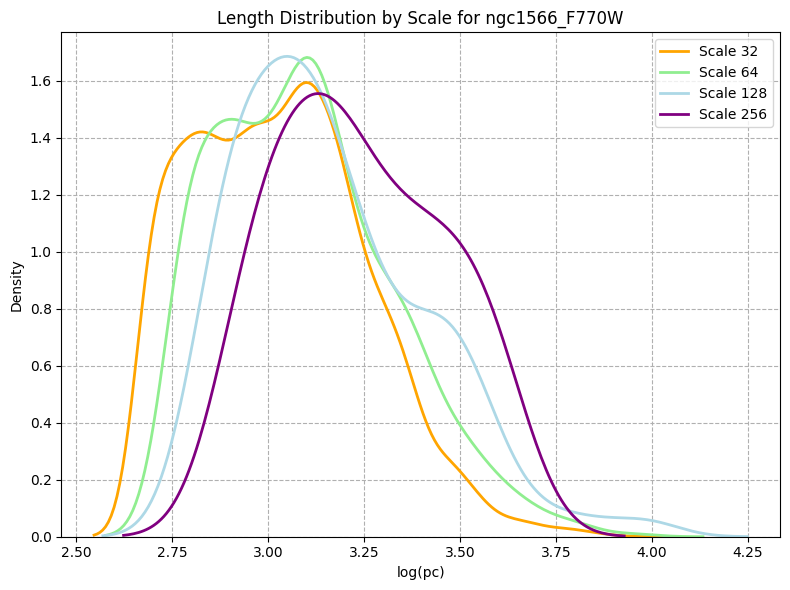

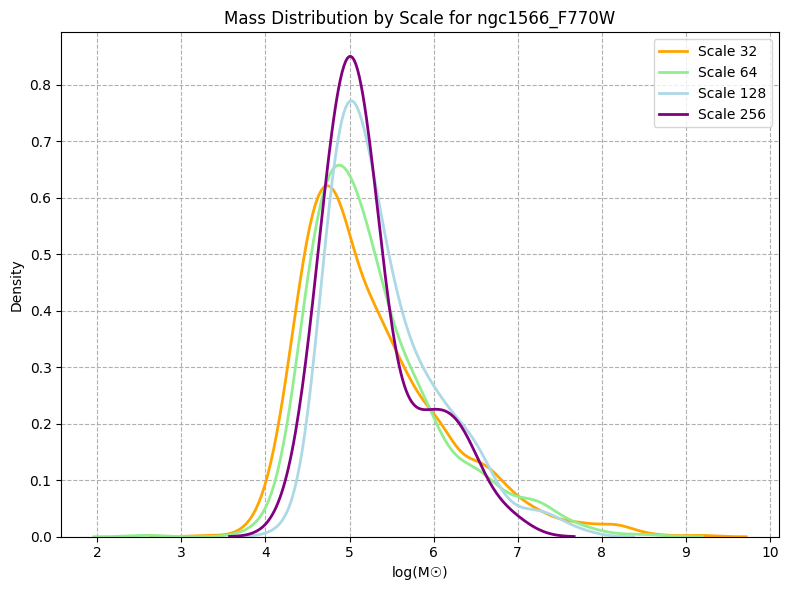

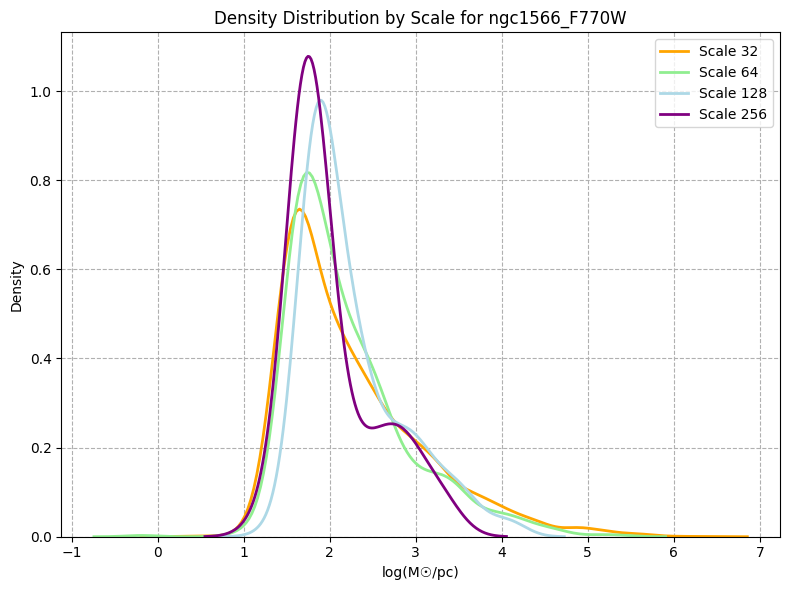

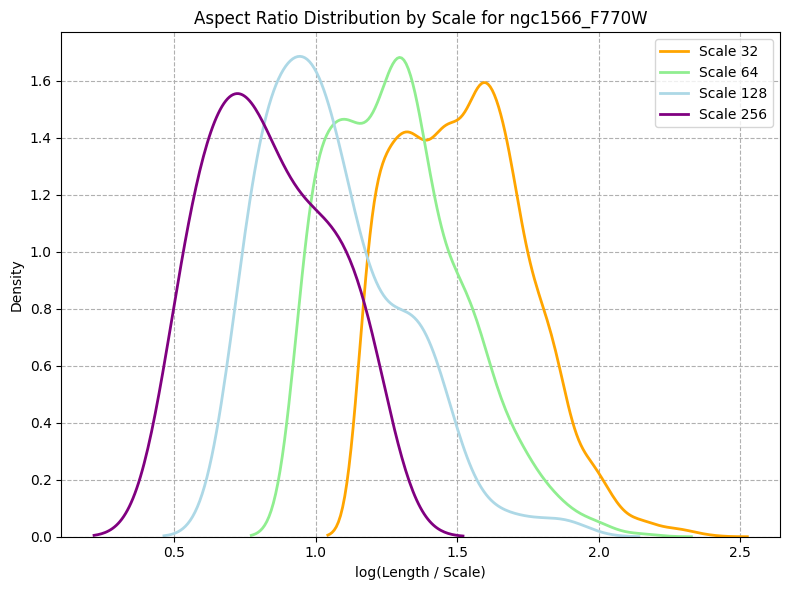

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc1672_F770W\SyntheticMap


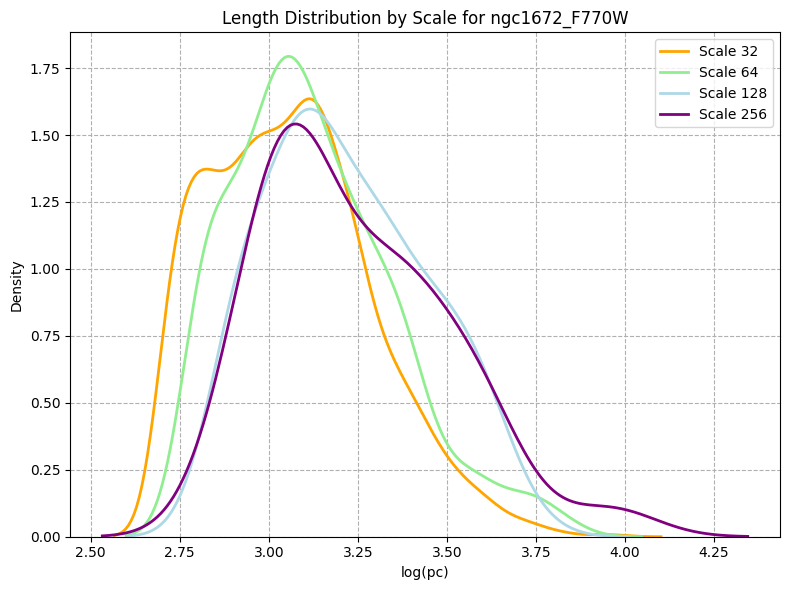

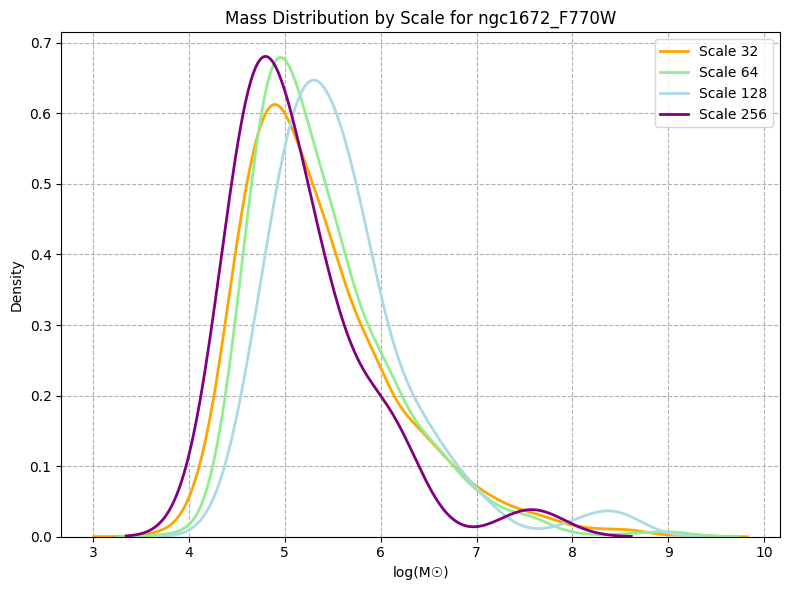

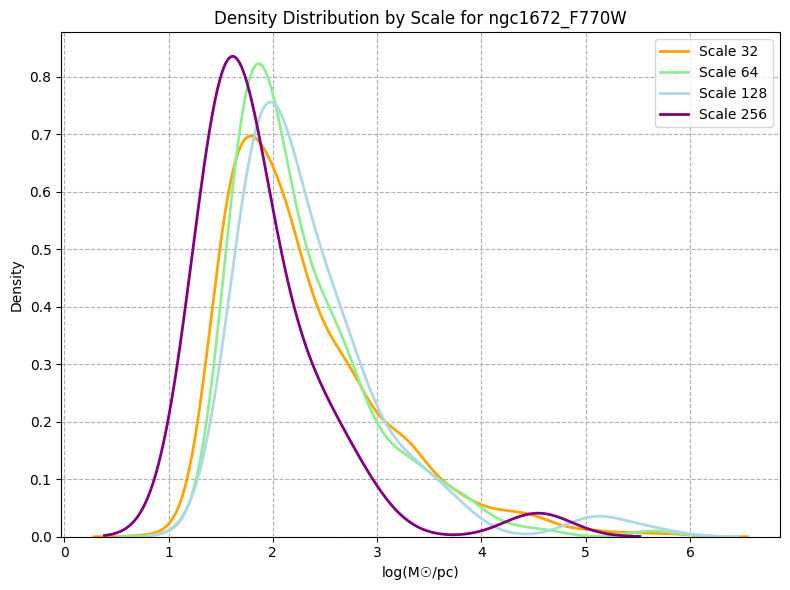

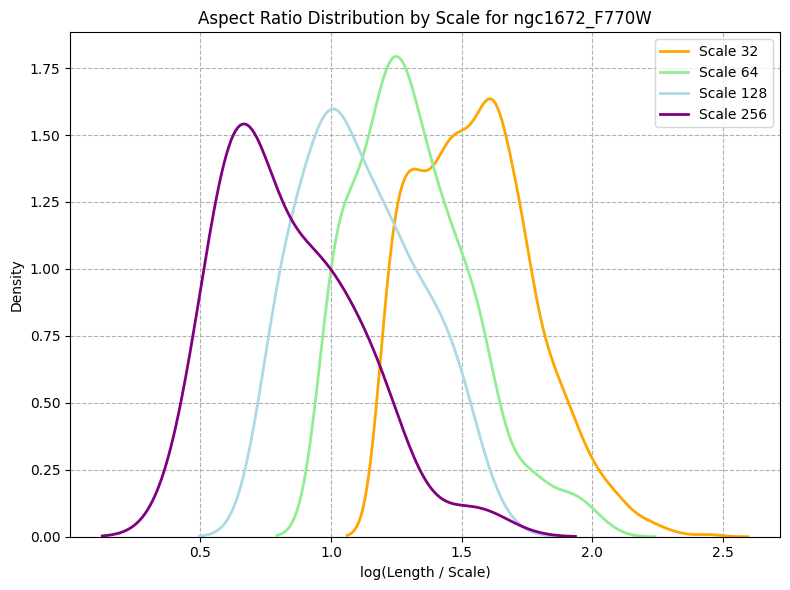

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc2090_F555W\SyntheticMap
C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc2835_F770W\SyntheticMap


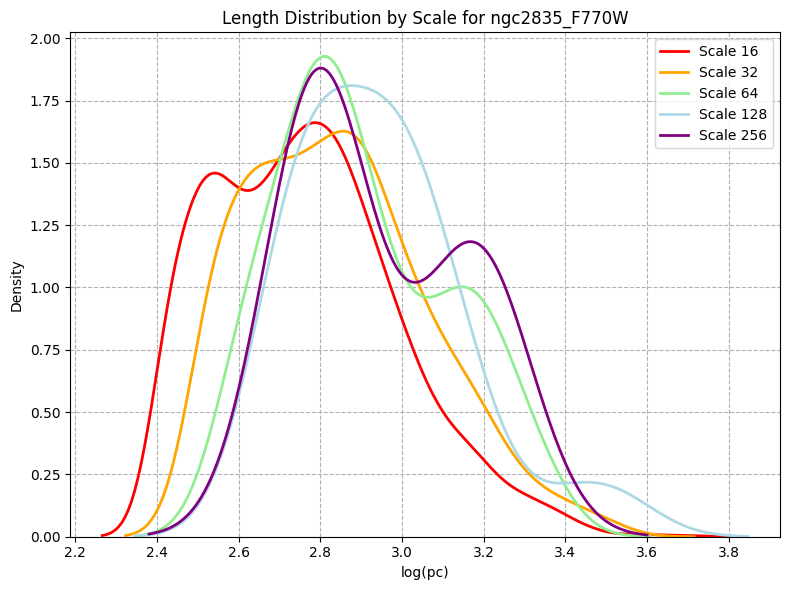

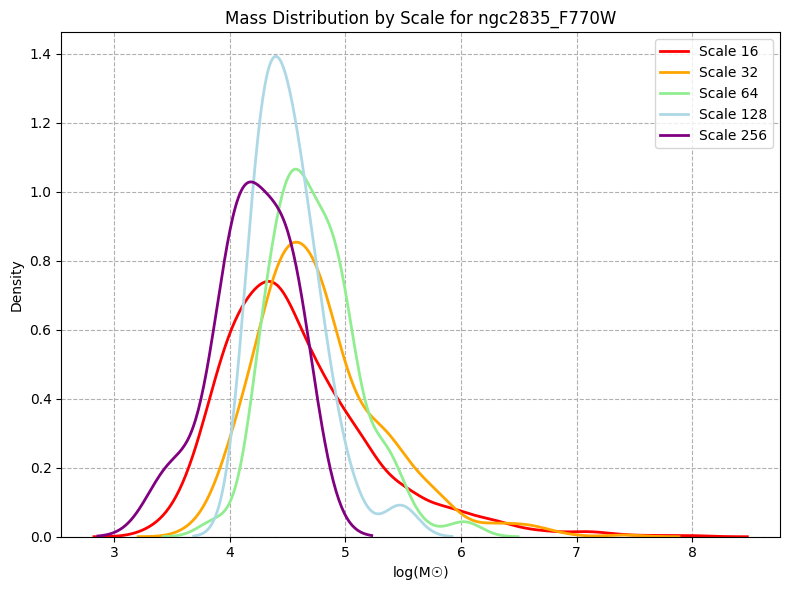

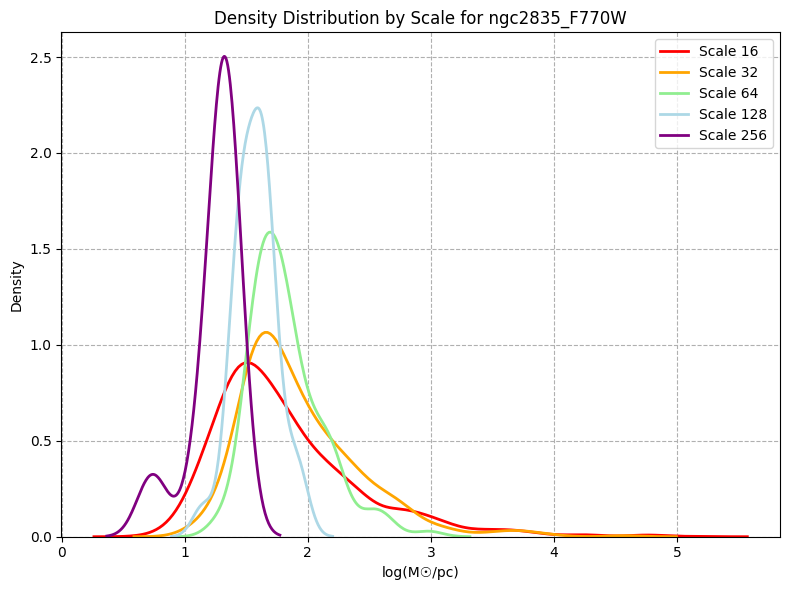

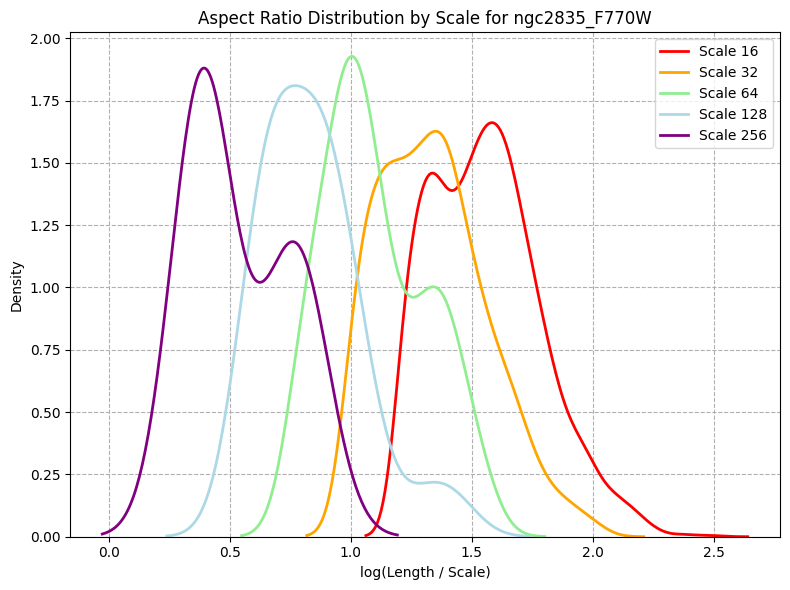

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc3351_F770W\SyntheticMap


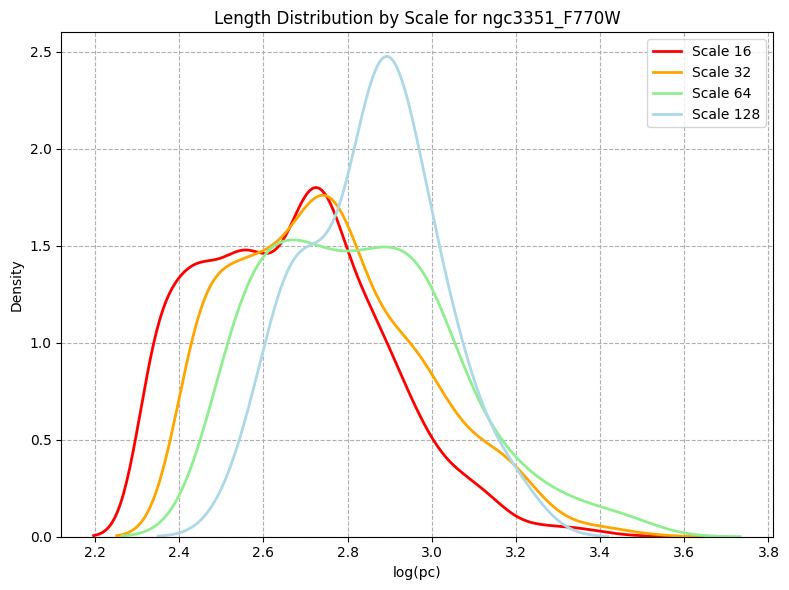

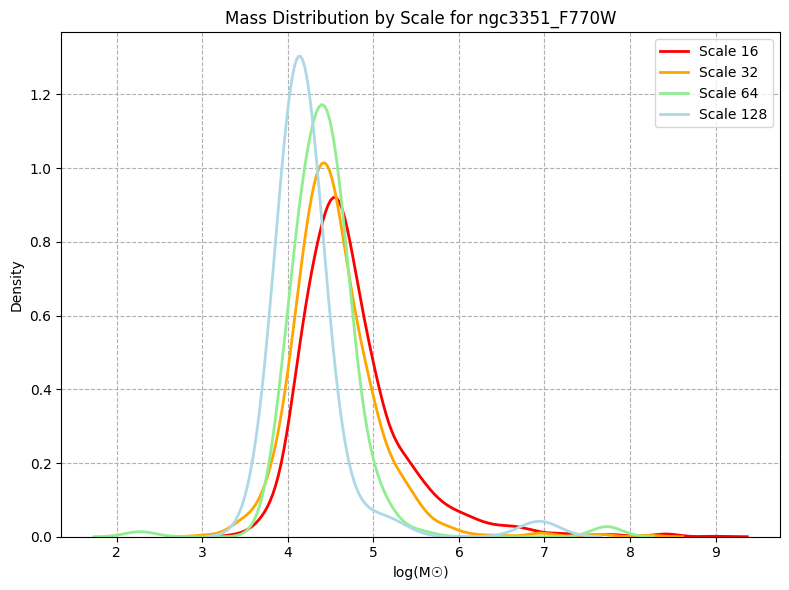

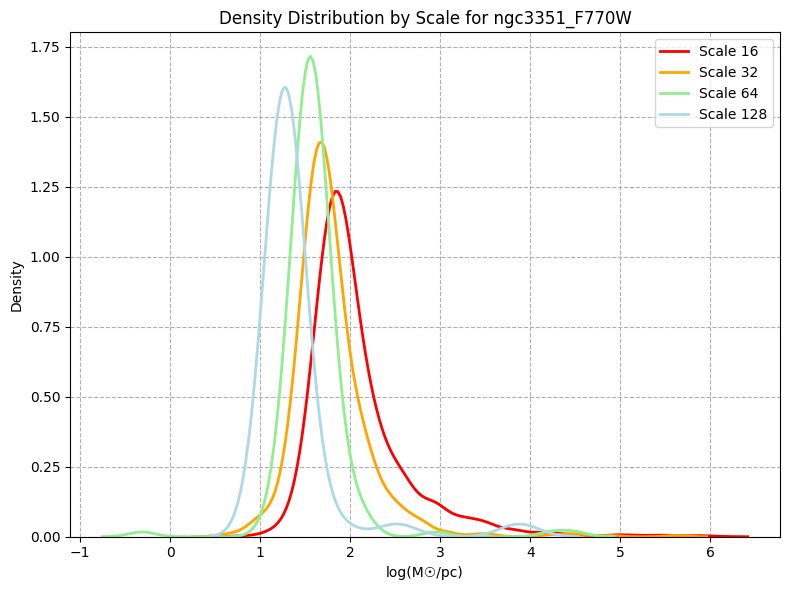

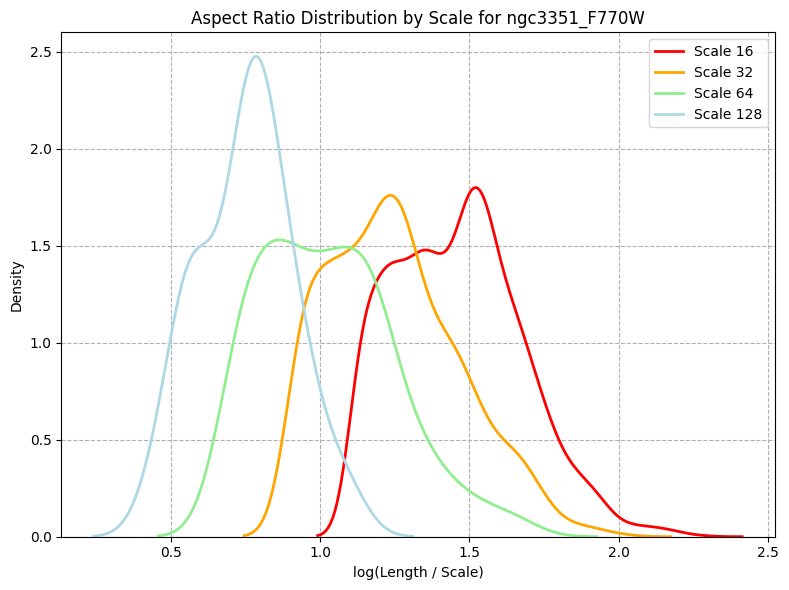

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc3627_F770W\SyntheticMap


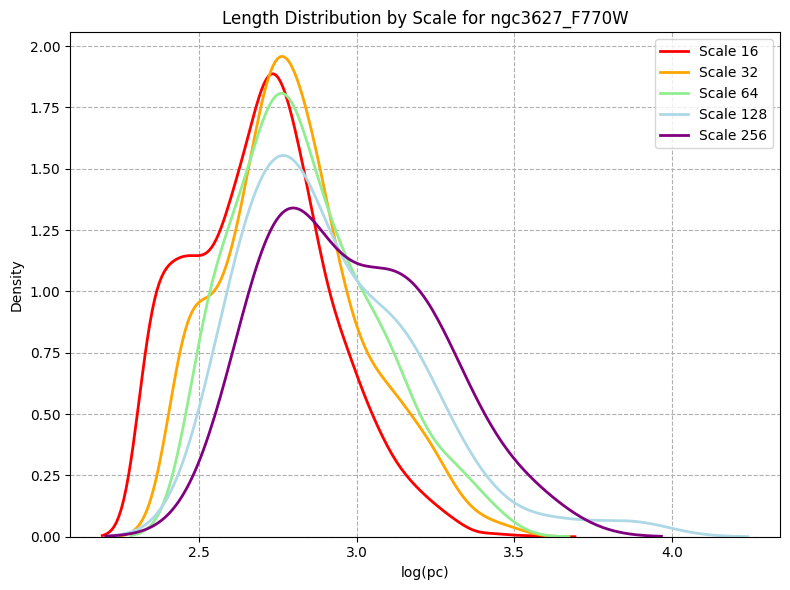

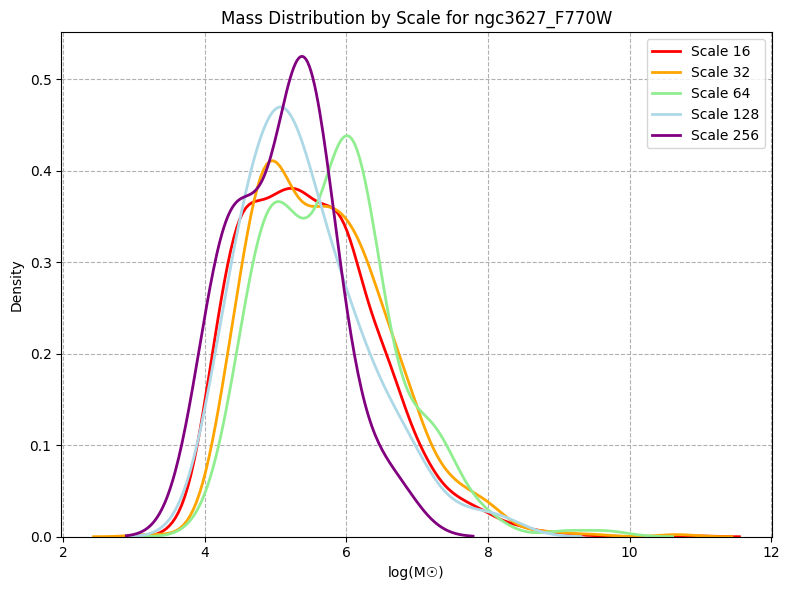

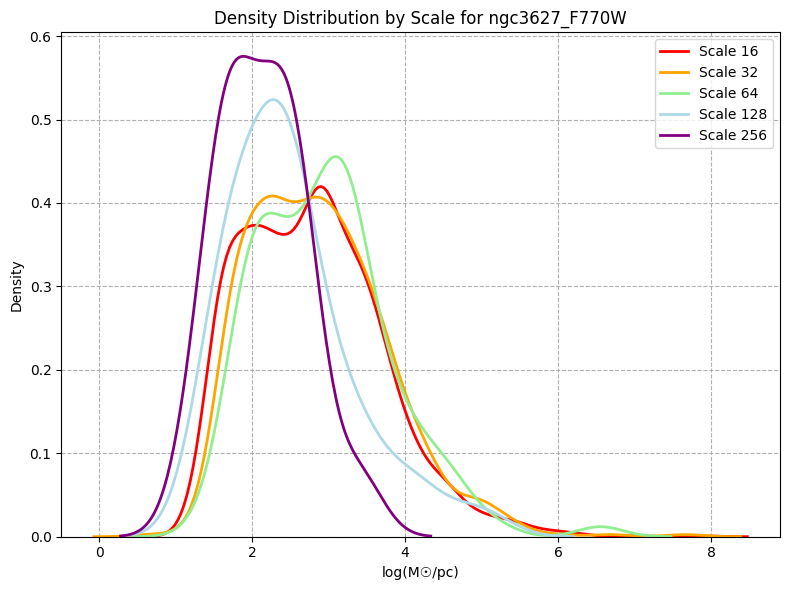

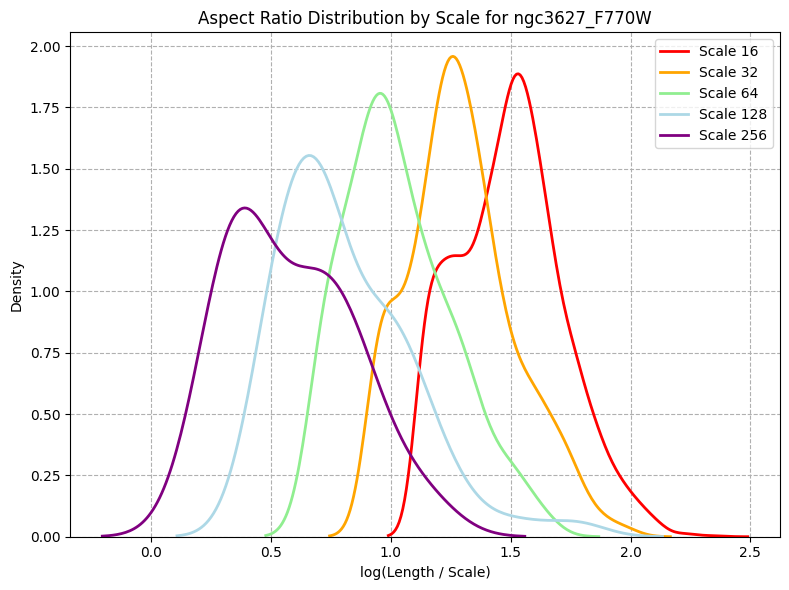

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc4254_F770W\SyntheticMap


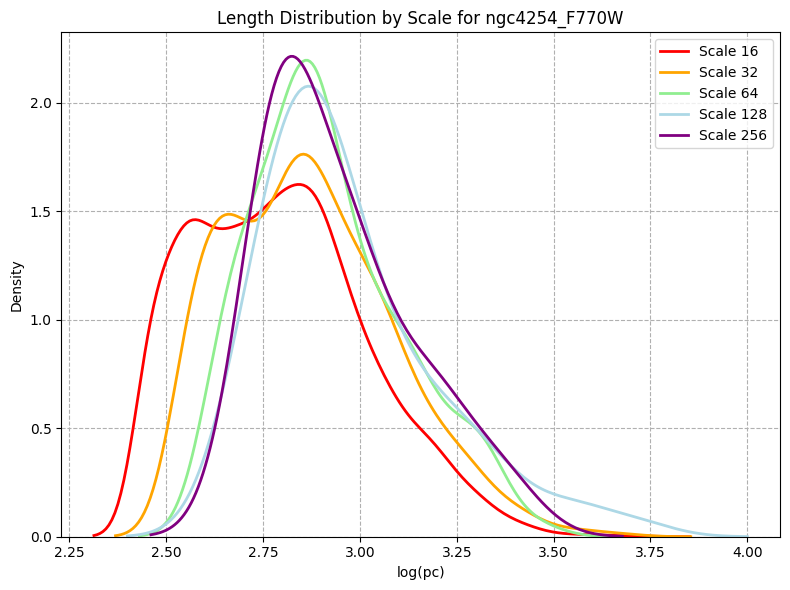

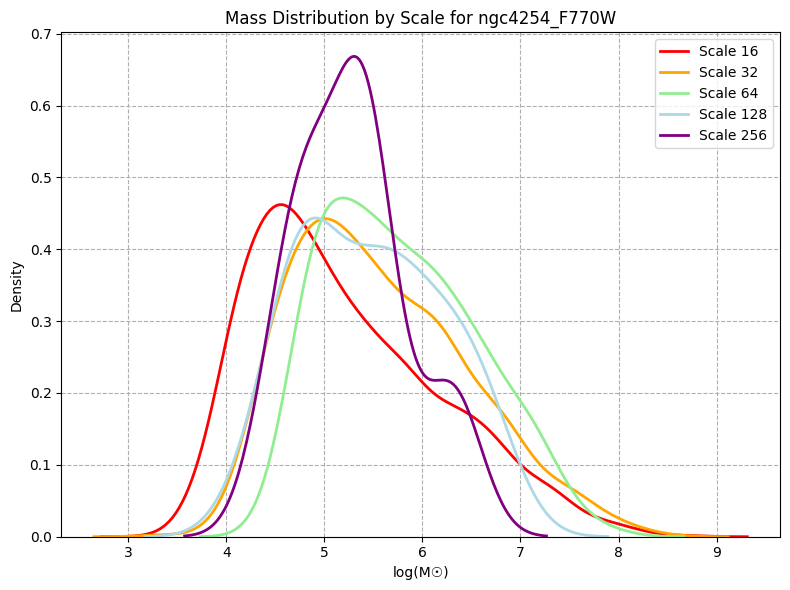

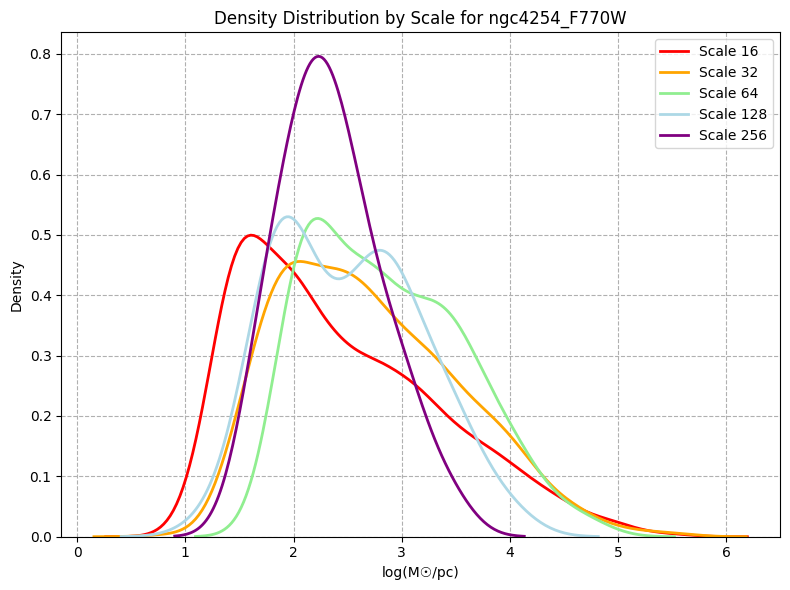

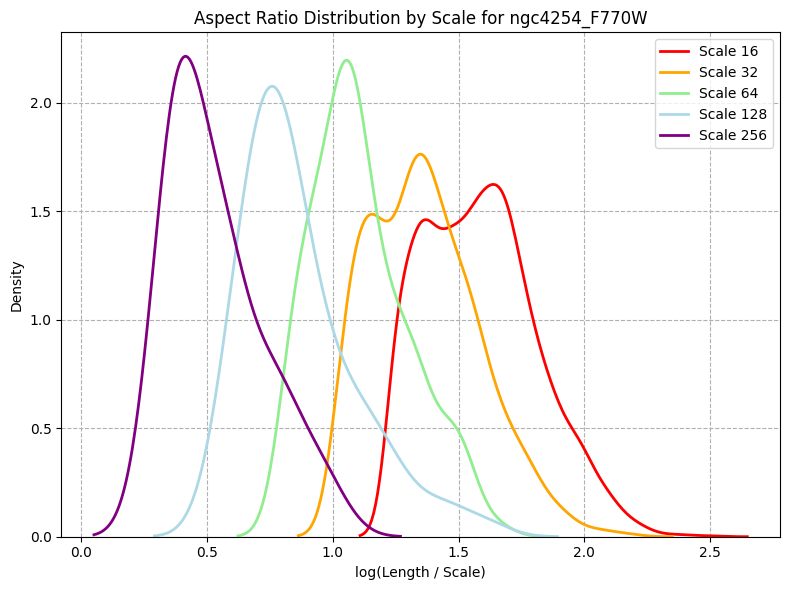

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc4303_F770W\SyntheticMap


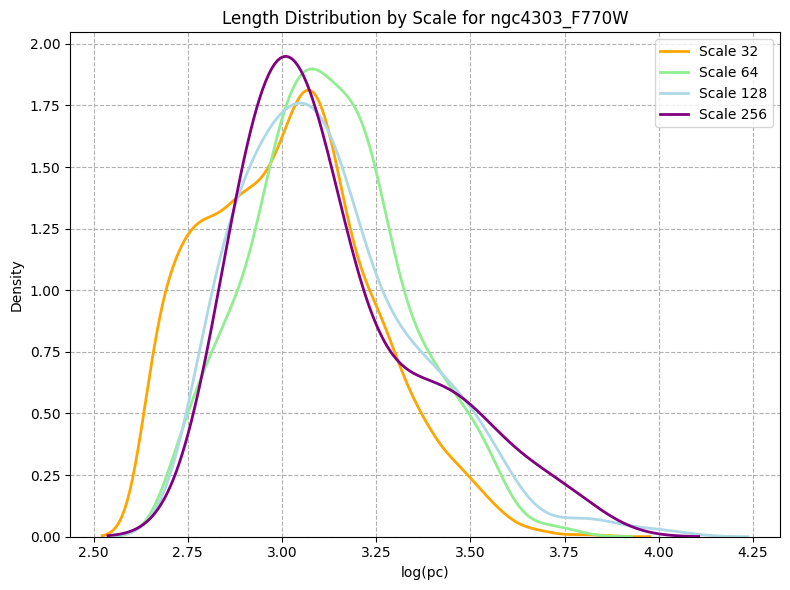

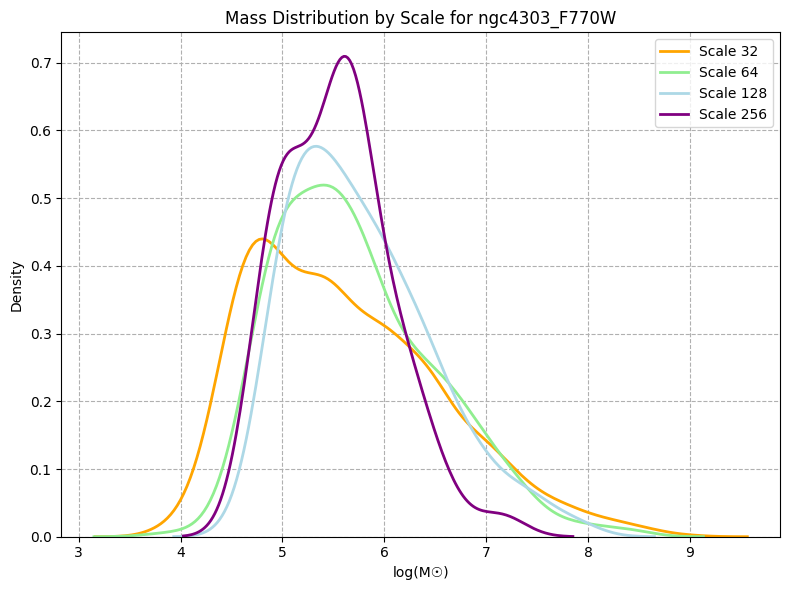

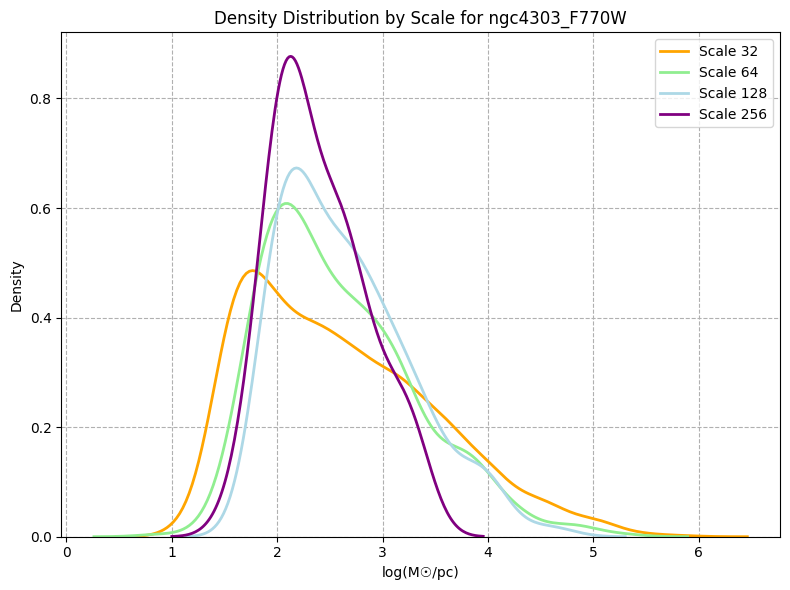

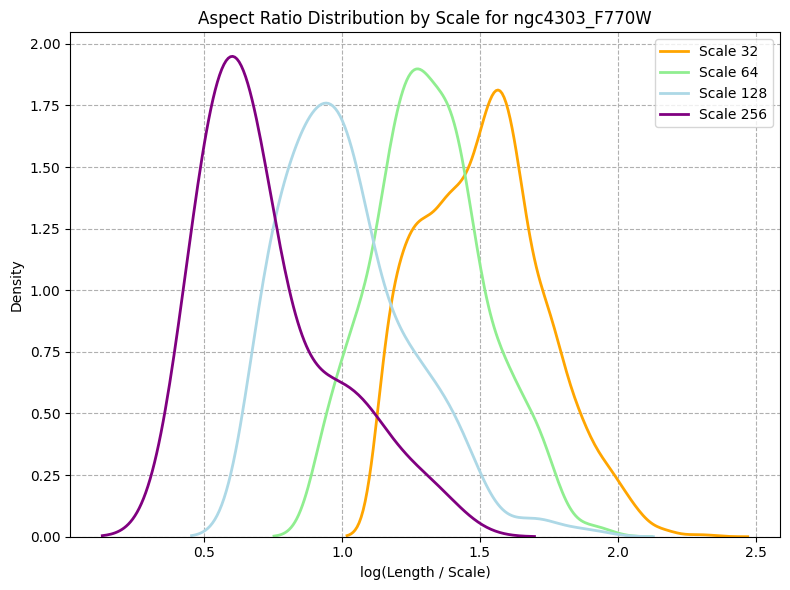

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc4321_F770W\SyntheticMap


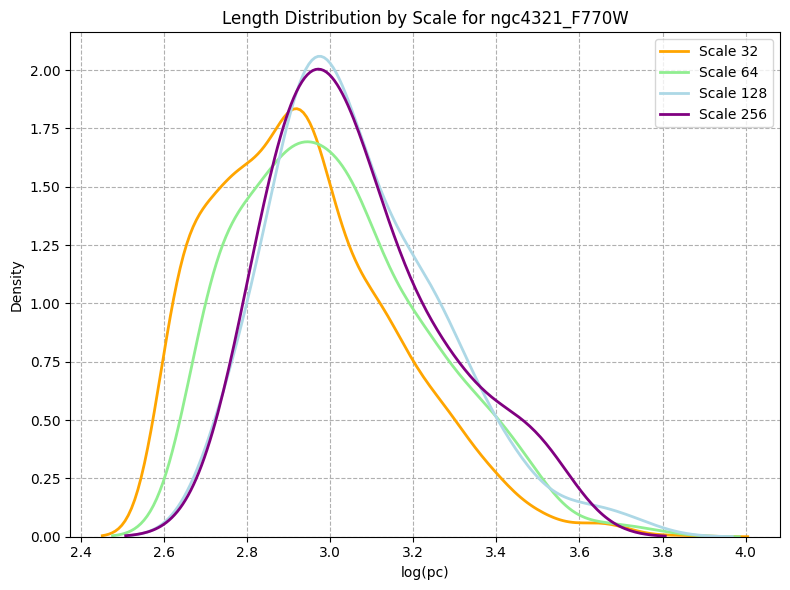

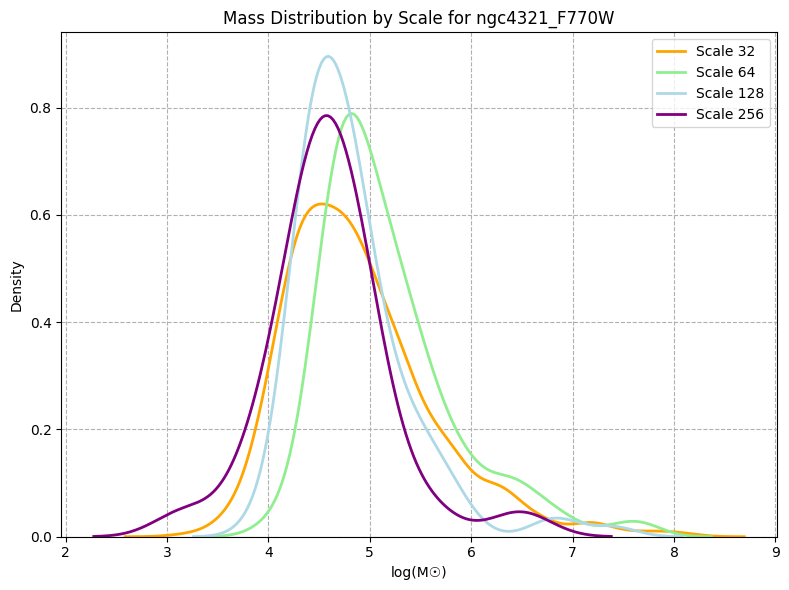

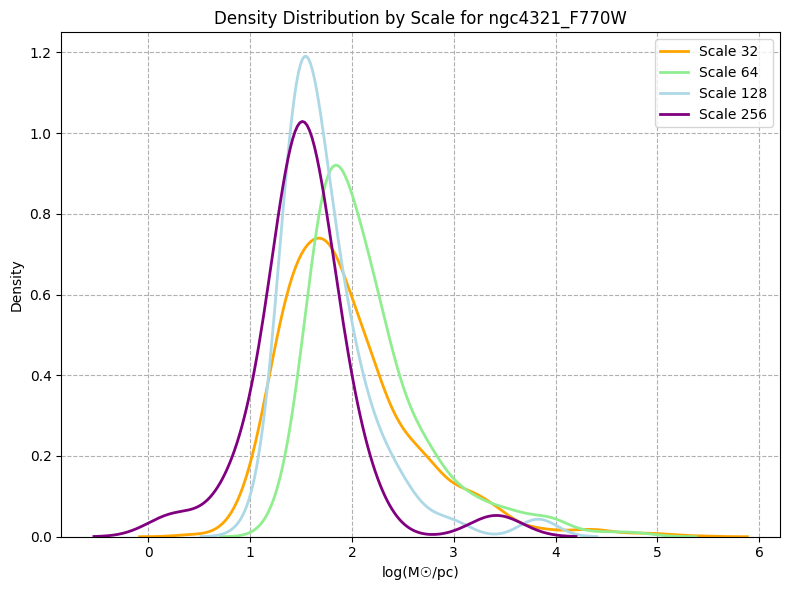

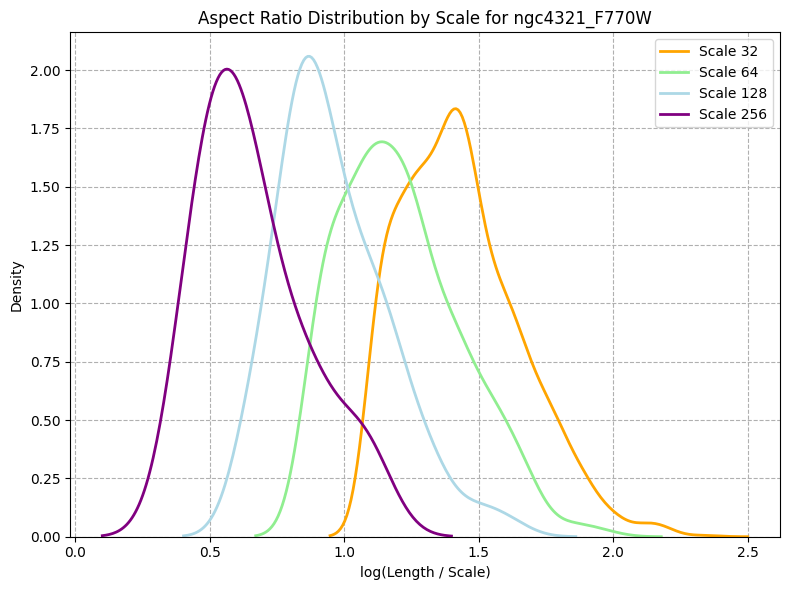

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc4535_F770W\SyntheticMap


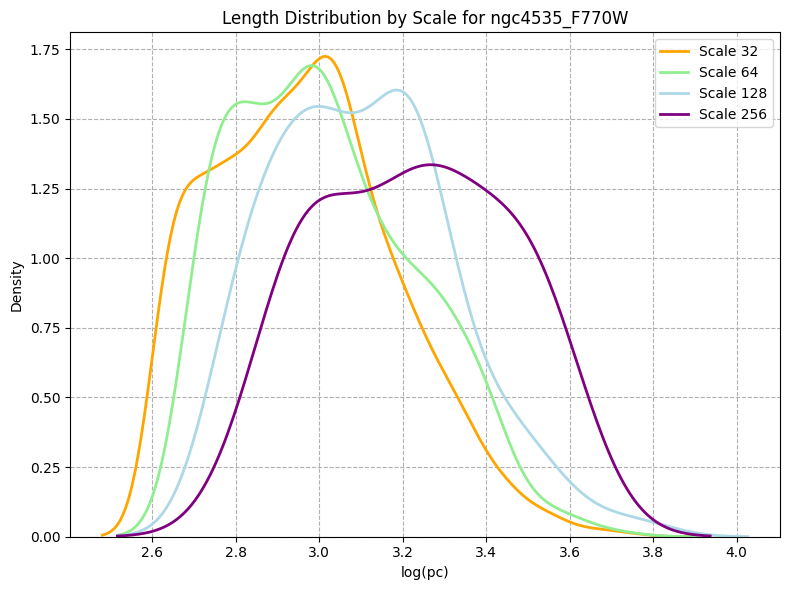

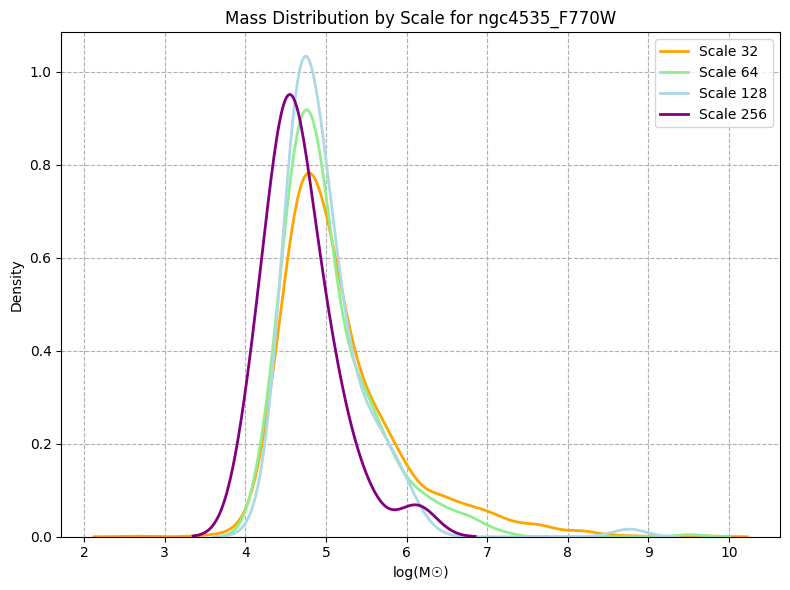

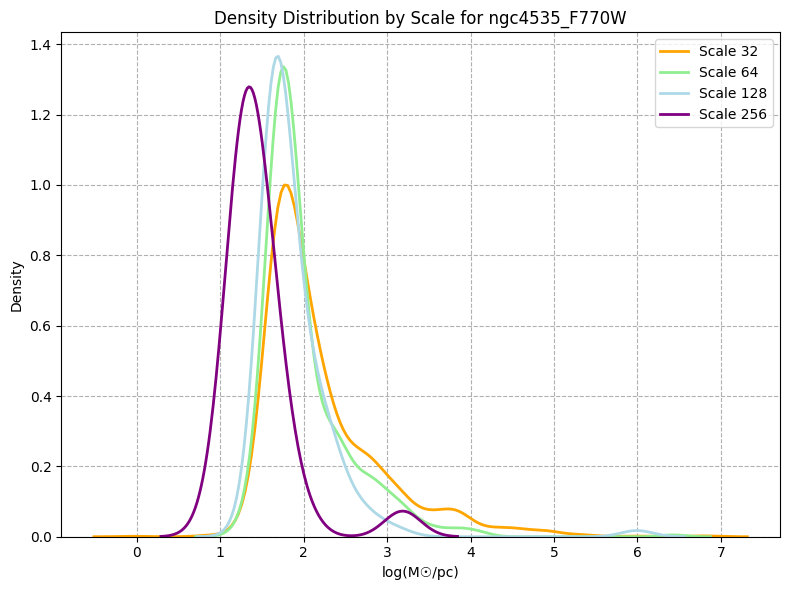

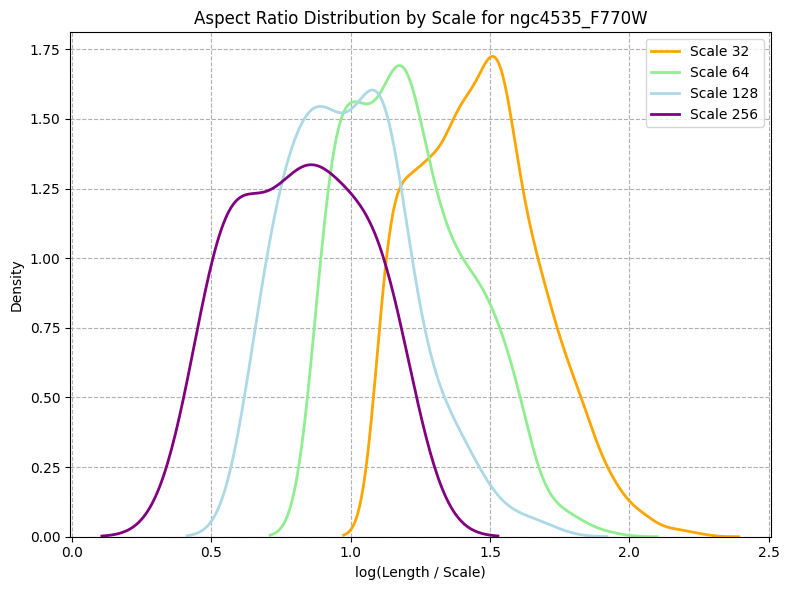

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc5068_F770W\SyntheticMap


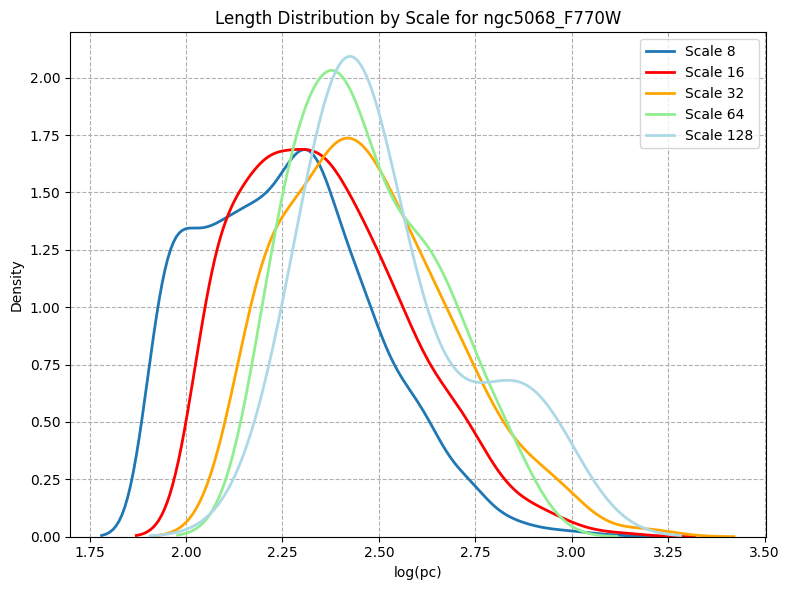

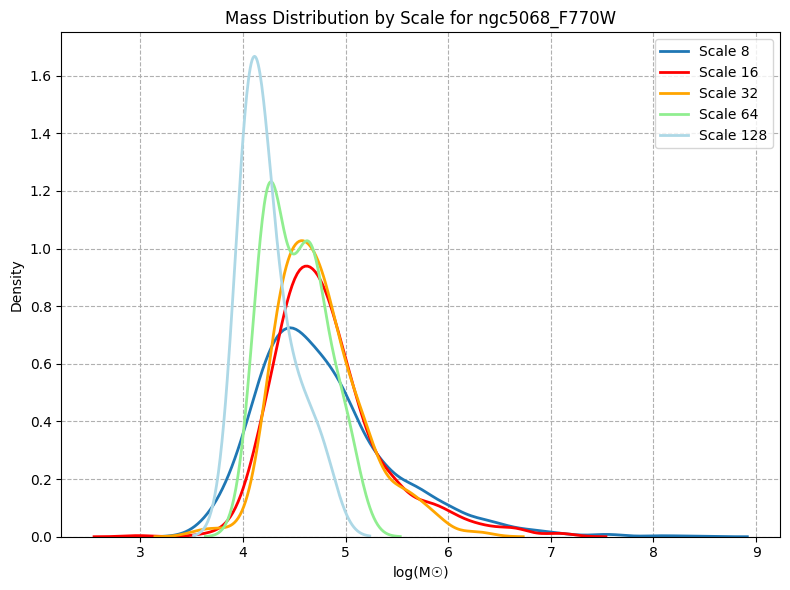

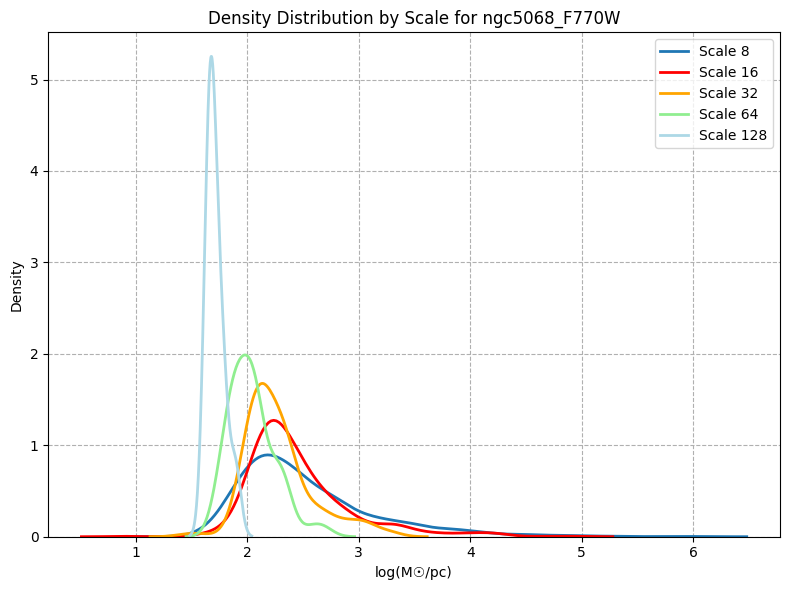

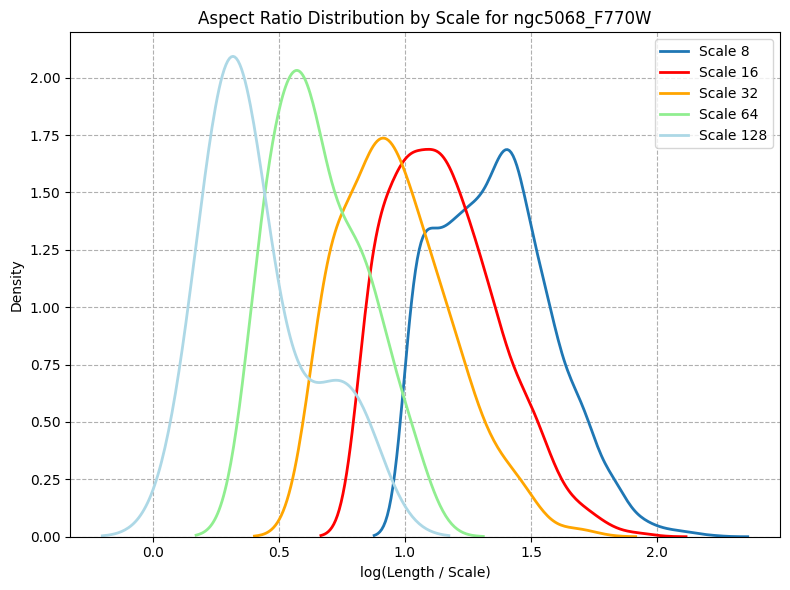

C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc7496_F770W\SyntheticMap


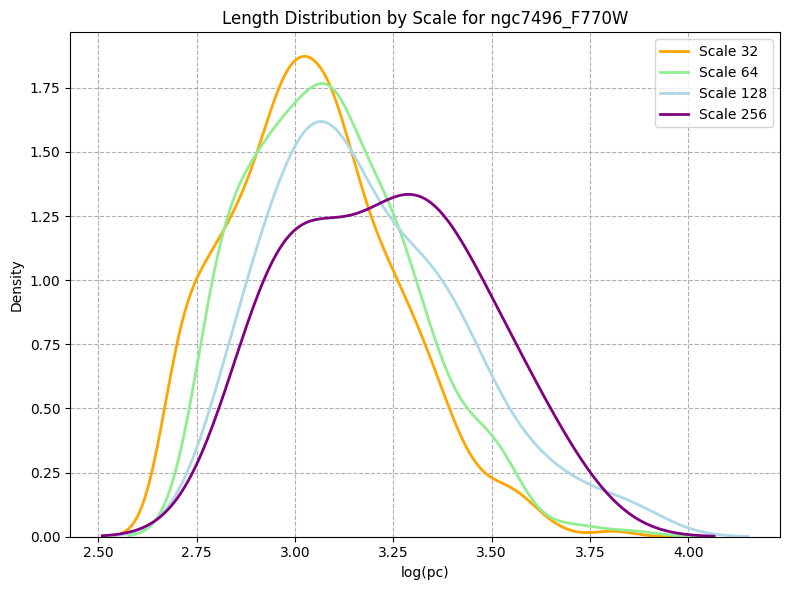

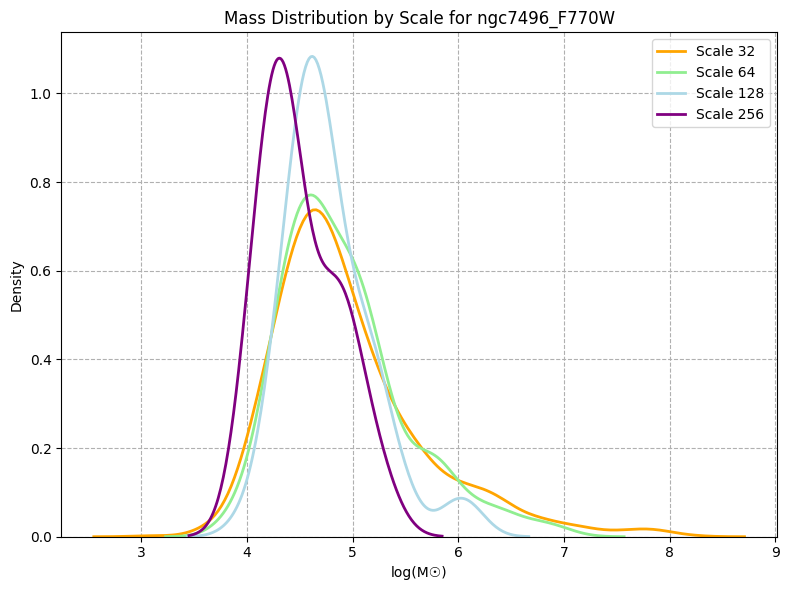

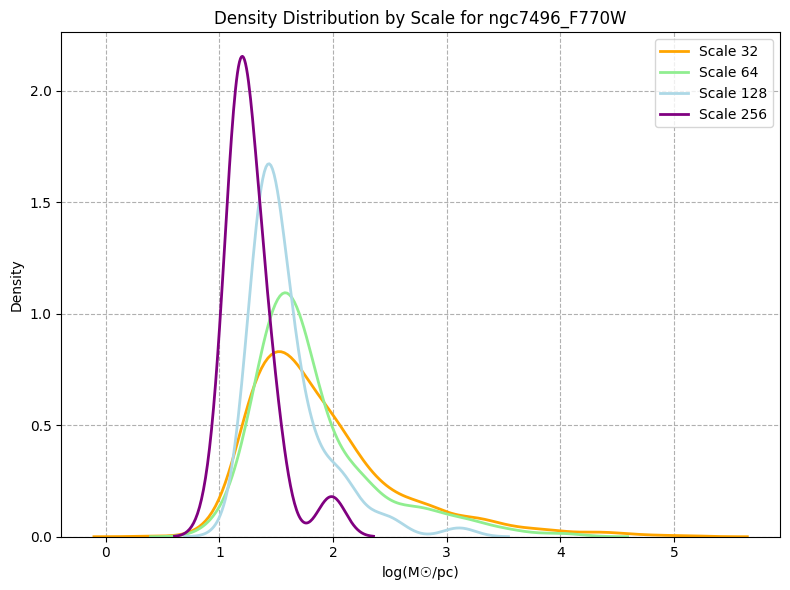

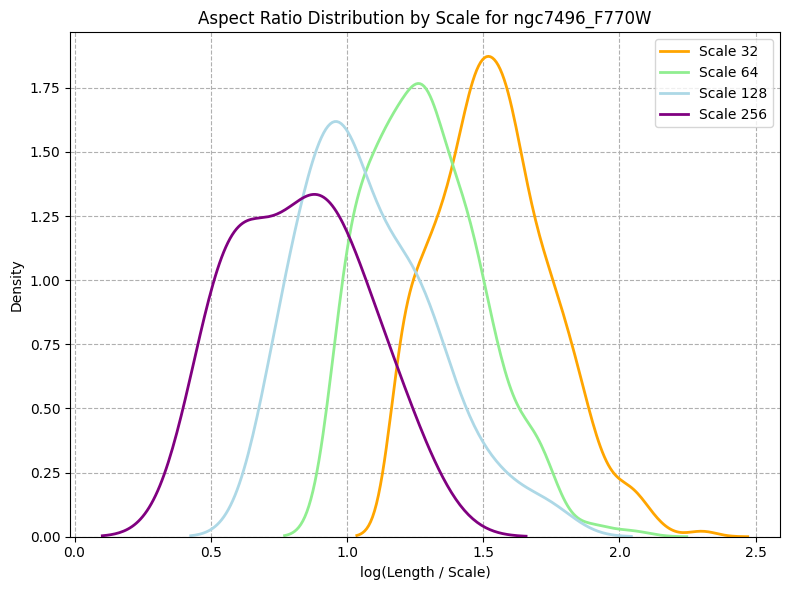

In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


def getScale(file):
    scales = ["1024", "512", "256", "128", "64", "32", "16", "8", "4", "2", "1", ".5", ".25", ".125", ".0625", ".03125"]
    for scale in scales:
        if scale in file:
            return scale
    print("Invalid file: Scale not recognized")
    return None

# Plotting functions
def plot_quantity(data_dict, quantity_type, galaxy):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        data = np.array(data_dict[scale])
        log_data = np.log10(data[data > 0])  # Filter out non-positive values
        color = scale_colors.get(scale, None)
        sns.kdeplot(log_data, label=f"Scale {scale}", linewidth=2, color=color)

    plt.xlabel({
        "length": "log(pc)",
        "mass": "log(M☉)",
        "density": "log(M☉/pc)"
    }[quantity_type])
    plt.ylabel("Density")
    plt.title(f"{quantity_type.capitalize()} Distribution by Scale for {galaxy}")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


def plot_aspect_ratio(data_dict, galaxy):
    plt.figure(figsize=(8, 6))
    for scale in sorted(data_dict.keys(), key=lambda x: float(x)):
        ratio = data_dict[scale]
        log_ratio = np.log10(ratio[ratio > 0])  # Avoid log(0)
        color = scale_colors.get(scale, None)
        sns.kdeplot(log_ratio, label=f"Scale {scale}", linewidth=2, color=color)

    plt.xlabel("log(Length / Scale)")
    plt.ylabel("Density")
    plt.title(f"Aspect Ratio Distribution by Scale for {galaxy}")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()





# Define your data path
base_dir  = Path(r"C:\Users\jhoffm72\Documents\FilPHANGS\Data")


for folder in os.listdir(base_dir):
    if folder == 'Figures' or folder == 'ImageData.xlsx' or folder == 'SoaxParams.txt' or folder == 'OriginalImages':
        continue
    galaxy_name = folder
    synthetic_folder = os.path.join(base_dir, folder)
    synthetic_folder = os.path.join(synthetic_folder, 'SyntheticMap')

    # Initialize data containers
    mass_dict = {}
    length_dict = {}
    density_dict = {}
    aspect_ratio_dict = {}

    print(synthetic_folder)
    # Load and categorize data
    for file in os.listdir(synthetic_folder):
        if not file.endswith(".fits"):
            file_path = os.path.join(synthetic_folder, file)
            if file.endswith(".xlsx"):
                df = pd.read_excel(file_path, engine='openpyxl')
            elif file.endswith(".xls"):
                df = pd.read_excel(file_path)
            elif file.endswith(".csv"):
                df = pd.read_csv(file_path)

            scale = getScale(file_path)
            if scale is None:
                continue

            try:
                mass = df[f'Mass_{scale}']
                if scale!=16:
                    Line_Density = df[f'Line_Density_{scale}'] /math.log2(int(scale))
                    lengths = df[f'Length_{scale}'] * math.log2(int(scale))
                else: 
                    Line_Density = df[f'Line_Density_{scale}'] 
                    lengths = df[f'Length_{scale}']

                mass_dict[scale] = np.array(mass)
                length_dict[scale] = np.array(lengths)
                density_dict[scale] = np.array(Line_Density)
                aspect_ratio_dict[scale] = np.array(lengths) / float(scale)
            except KeyError:
                print(f"Missing expected columns for scale {scale} in file: {file}")
            except ValueError:
                print(f"Non-numeric scale detected: {scale}")


    scale_colors = {
        "16": "red",
        "32": "orange",
        "64": "lightgreen",
        "128": "lightblue",
        "256": "purple"
    }

    if length_dict:
        # Plot all quantities
        plot_quantity(length_dict, "length", galaxy_name)
        plot_quantity(mass_dict, "mass", galaxy_name)
        plot_quantity(density_dict, "density", galaxy_name)
        plot_aspect_ratio(aspect_ratio_dict, galaxy_name)

In [ ]:
#To Do

#0)Source Removal
#2) Determine filament overlap and flux fractions along scales for each filament
#3) Repeat for simulation? Add noise? 
#Monday time: 11:00 am